In [1]:
!pip install scikit-plot
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras import backend as K
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from keras.layers import Dropout
def keras_internal_binary_classification_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))
def custom_accuracy(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp + tn)
    denominator = (tp + tn + fp + fn)

    return numerator / (denominator + K.epsilon())
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('train_pronto.csv')
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Using TensorFlow backend.


Saving train_pronto.csv to train_pronto (1).csv


In [0]:
es = EarlyStopping(monitor='val_loss', patience=15)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)
def build_DROPOUT_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model1():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model2():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model3():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model4():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model5():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model6():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model

In [3]:
DROPOUT_model = build_DROPOUT_model()
storia_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history
DROPOUT_model1 = build_DROPOUT_model()
storia_DROPOUT1 = DROPOUT_model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model2 = build_DROPOUT_model()
storia_DROPOUT2 = DROPOUT_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model3 = build_DROPOUT_model()
storia_DROPOUT3 = DROPOUT_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model4 = build_DROPOUT_model()
storia_DROPOUT4 = DROPOUT_model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model5 = build_DROPOUT_model1()
storia_DROPOUT5 = DROPOUT_model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history
DROPOUT_model6 = build_DROPOUT_model1()
storia_DROPOUT6 = DROPOUT_model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model7 = build_DROPOUT_model1()
storia_DROPOUT7 = DROPOUT_model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model8 = build_DROPOUT_model1()
storia_DROPOUT8 = DROPOUT_model8.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model9 = build_DROPOUT_model1()
storia_DROPOUT9 = DROPOUT_model9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model10 = build_DROPOUT_model2()
storia_DROPOUT10 = DROPOUT_model10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/1000
11513/11513 [==============================] - 3s 280us/step - loss: 0.2961 - custom_accuracy: 0.8534 - accuracy: 0.8533 - val_loss: 0.1833 - val_custom_accuracy: 0.9391 - val_accuracy: 0.9390
Epoch 2/1000
11513/11513 [==============================] - 3s 259us/step - loss: 0.2583 - custom_accuracy: 0.8660 - accuracy: 0.8663 - val_loss: 0.1742 - val_custom_accuracy: 0.9385 - val_accuracy: 0.9384
Epoch 3/1000
11513/11513 [==============================] - 3s 253us/step - loss: 0.2878 - custom_accuracy: 0.8398 - accuracy: 0.8397 - val_loss: 0.1660 - val_custom_accuracy: 0.9492 - val_accuracy: 0.9491
Epoch 4/1000
11513/11513 [==============================] - 3s 241us/step - loss: 0.3300 - custom_accuracy: 0.8294 - accuracy: 0.8293 - val_loss: 0.1722 - val_custom_accuracy: 0.9506 - val_accuracy: 0.9506
Epoch 5/1000
11513/11513 [==============================] - 3s 239us/step - loss: 0.3006 - custom_accuracy: 0.8361 - accuracy: 

In [0]:
DROPOUT_model11 = build_DROPOUT_model2()
storia_DROPOUT11 = DROPOUT_model11.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model12 = build_DROPOUT_model2()
storia_DROPOUT12 = DROPOUT_model12.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model13 = build_DROPOUT_model2()
storia_DROPOUT13 = DROPOUT_model13.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model14 = build_DROPOUT_model2()
storia_DROPOUT14 = DROPOUT_model14.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model15 = build_DROPOUT_model3()
storia_DROPOUT15 = DROPOUT_model15.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history
DROPOUT_model16 = build_DROPOUT_model3()
storia_DROPOUT16 = DROPOUT_model16.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model17 = build_DROPOUT_model3()
storia_DROPOUT17 = DROPOUT_model17.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model18 = build_DROPOUT_model3()
storia_DROPOUT18 = DROPOUT_model18.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model19 = build_DROPOUT_model3()
storia_DROPOUT19 = DROPOUT_model19.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model20 = build_DROPOUT_model4()
storia_DROPOUT20 = DROPOUT_model20.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/1000
11513/11513 [==============================] - 1s 98us/step - loss: 0.3485 - custom_accuracy: 0.7923 - accuracy: 0.7919 - val_loss: 0.1987 - val_custom_accuracy: 0.9465 - val_accuracy: 0.9465
Epoch 2/1000
11513/11513 [==============================] - 1s 57us/step - loss: 0.1597 - custom_accuracy: 0.9458 - accuracy: 0.9456 - val_loss: 0.1071 - val_custom_accuracy: 0.9491 - val_accuracy: 0.9491
Epoch 3/1000
11513/11513 [==============================] - 1s 64us/step - loss: 0.1270 - custom_accuracy: 0.9508 - accuracy: 0.9507 - val_loss: 0.1026 - val_custom_accuracy: 0.9524 - val_accuracy: 0.9524
Epoch 4/1000
11513/11513 [==============================] - 1s 59us/step - loss: 0.1098 - custom_accuracy: 0.9588 - accuracy: 0.9587 - val_loss: 0.0714 - val_custom_accuracy: 0.9801 - val_accuracy: 0.9801
Epoch 5/1000
11513/11513 [==============================] - 1s 64us/step - loss: 0.1015 - custom_accuracy: 0.9632 - accuracy: 0.963

In [7]:
DROPOUT_model21 = build_DROPOUT_model4()
storia_DROPOUT21 = DROPOUT_model21.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model22 = build_DROPOUT_model4()
storia_DROPOUT22 = DROPOUT_model22.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model23 = build_DROPOUT_model4()
storia_DROPOUT23 = DROPOUT_model23.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model24 = build_DROPOUT_model4()
storia_DROPOUT24 = DROPOUT_model24.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model25 = build_DROPOUT_model5()
storia_DROPOUT25 = DROPOUT_model25.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history
DROPOUT_model26 = build_DROPOUT_model5()
storia_DROPOUT26 = DROPOUT_model26.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model27 = build_DROPOUT_model5()
storia_DROPOUT27 = DROPOUT_model27.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model28 = build_DROPOUT_model5()
storia_DROPOUT28 = DROPOUT_model28.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model29 = build_DROPOUT_model5()
storia_DROPOUT29 = DROPOUT_model29.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history
DROPOUT_model30 = build_DROPOUT_model6()
storia_DROPOUT30 = DROPOUT_model30.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, callbacks=[es,mc]).history
DROPOUT_model31 = build_DROPOUT_model6()
storia_DROPOUT31 = DROPOUT_model31.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=50, callbacks=[es,mc]).history
DROPOUT_model32 = build_DROPOUT_model6()
storia_DROPOUT32 = DROPOUT_model32.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=100, callbacks=[es,mc]).history
DROPOUT_model33 = build_DROPOUT_model6()
storia_DROPOUT33 = DROPOUT_model33.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history
DROPOUT_model34 = build_DROPOUT_model6()
storia_DROPOUT34 = DROPOUT_model34.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/1000
11513/11513 [==============================] - 1s 99us/step - loss: 0.3307 - custom_accuracy: 0.8051 - accuracy: 0.8045 - val_loss: 0.1974 - val_custom_accuracy: 0.9517 - val_accuracy: 0.9518
Epoch 2/1000
11513/11513 [==============================] - 1s 58us/step - loss: 0.1940 - custom_accuracy: 0.9550 - accuracy: 0.9551 - val_loss: 0.1818 - val_custom_accuracy: 0.9570 - val_accuracy: 0.9570
Epoch 3/1000
11513/11513 [==============================] - 1s 57us/step - loss: 0.1729 - custom_accuracy: 0.9606 - accuracy: 0.9607 - val_loss: 0.1506 - val_custom_accuracy: 0.9759 - val_accuracy: 0.9759
Epoch 4/1000
11513/11513 [==============================] - 1s 59us/step - loss: 0.1452 - custom_accuracy: 0.9769 - accuracy: 0.9768 - val_loss: 0.1234 - val_custom_accuracy: 0.9880 - val_accuracy: 0.9880
Epoch 5/1000
11513/11513 [==============================] - 1s 62us/step - loss: 0.1228 - custom_accuracy: 0.9846 - accuracy: 0.984

In [8]:
test_loss, test_custom_acc, test_acc = DROPOUT_model.evaluate(X_test, y_test)
test_loss_1, test_custom_acc_1, test_acc_1 = DROPOUT_model1.evaluate(X_test, y_test)
test_loss_2, test_custom_acc_2, test_acc_2 = DROPOUT_model2.evaluate(X_test, y_test)
test_loss_3, test_custom_acc_3, test_acc_3 = DROPOUT_model3.evaluate(X_test, y_test)
test_loss_4, test_custom_acc_4, test_acc_4 = DROPOUT_model4.evaluate(X_test, y_test)
test_loss_5, test_custom_acc_5, test_acc_5 = DROPOUT_model5.evaluate(X_test, y_test)
test_loss_6, test_custom_acc_6, test_acc_6 = DROPOUT_model6.evaluate(X_test, y_test)
test_loss_7, test_custom_acc_7, test_acc_7 = DROPOUT_model7.evaluate(X_test, y_test)
test_loss_8, test_custom_acc_8, test_acc_8 = DROPOUT_model8.evaluate(X_test, y_test)
test_loss_9, test_custom_acc_9, test_acc_9 = DROPOUT_model9.evaluate(X_test, y_test)
test_loss_10, test_custom_acc_10, test_acc_10 = DROPOUT_model10.evaluate(X_test, y_test)
test_loss_11, test_custom_acc_11, test_acc_11 = DROPOUT_model11.evaluate(X_test, y_test)
test_loss_12, test_custom_acc_12, test_acc_12 = DROPOUT_model12.evaluate(X_test, y_test)
test_loss_13, test_custom_acc_13, test_acc_13 = DROPOUT_model13.evaluate(X_test, y_test)
test_loss_14, test_custom_acc_14, test_acc_14 = DROPOUT_model14.evaluate(X_test, y_test)
test_loss_15, test_custom_acc_15, test_acc_15 = DROPOUT_model15.evaluate(X_test, y_test)
test_loss_16, test_custom_acc_16, test_acc_16 = DROPOUT_model16.evaluate(X_test, y_test)
test_loss_17, test_custom_acc_17, test_acc_17 = DROPOUT_model17.evaluate(X_test, y_test)
test_loss_18, test_custom_acc_18, test_acc_18 = DROPOUT_model18.evaluate(X_test, y_test)
test_loss_19, test_custom_acc_19, test_acc_19 = DROPOUT_model19.evaluate(X_test, y_test)
test_loss_20, test_custom_acc_20, test_acc_20 = DROPOUT_model20.evaluate(X_test, y_test)
test_loss_21, test_custom_acc_21, test_acc_21 = DROPOUT_model21.evaluate(X_test, y_test)
test_loss_22, test_custom_acc_22, test_acc_22 = DROPOUT_model22.evaluate(X_test, y_test)
test_loss_23, test_custom_acc_23, test_acc_23 = DROPOUT_model23.evaluate(X_test, y_test)
test_loss_24, test_custom_acc_24, test_acc_24 = DROPOUT_model24.evaluate(X_test, y_test)
test_loss_25, test_custom_acc_25, test_acc_25 = DROPOUT_model25.evaluate(X_test, y_test)
test_loss_26, test_custom_acc_26, test_acc_26 = DROPOUT_model26.evaluate(X_test, y_test)
test_loss_27, test_custom_acc_27, test_acc_27 = DROPOUT_model27.evaluate(X_test, y_test)
test_loss_28, test_custom_acc_28, test_acc_28 = DROPOUT_model28.evaluate(X_test, y_test)
test_loss_29, test_custom_acc_29, test_acc_29 = DROPOUT_model29.evaluate(X_test, y_test)
test_loss_30, test_custom_acc_30, test_acc_30 = DROPOUT_model30.evaluate(X_test, y_test)
test_loss_31, test_custom_acc_31, test_acc_31 = DROPOUT_model31.evaluate(X_test, y_test)
test_loss_32, test_custom_acc_32, test_acc_32 = DROPOUT_model32.evaluate(X_test, y_test)
test_loss_33, test_custom_acc_33, test_acc_33 = DROPOUT_model33.evaluate(X_test, y_test)
test_loss_34, test_custom_acc_34, test_acc_34 = DROPOUT_model34.evaluate(X_test, y_test)
print('numero 0','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('numero 1','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('numero 2','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('numero 3','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))
print('numero 4','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_4, test_custom_acc_4, test_acc_4))
print('numero 5','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_5, test_custom_acc_5, test_acc_5))
print('numero 6','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_6, test_custom_acc_6, test_acc_6))
print('numero 7','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_7, test_custom_acc_7, test_acc_7))
print('numero 8','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_8, test_custom_acc_8, test_acc_8))
print('numero 9','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_9, test_custom_acc_9, test_acc_9))
print('numero 10','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_10, test_custom_acc_10, test_acc_10))
print('numero 11','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_11, test_custom_acc_11, test_acc_11))
print('numero 12','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_12, test_custom_acc_12, test_acc_12))
print('numero 13','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_13, test_custom_acc_13, test_acc_13))
print('numero 14','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_14, test_custom_acc_14, test_acc_14))
print('numero 15','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_15, test_custom_acc_15, test_acc_15))
print('numero 16','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_16, test_custom_acc_16, test_acc_16))
print('numero 17','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_17, test_custom_acc_17, test_acc_17))
print('numero 18','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_18, test_custom_acc_18, test_acc_18))
print('numero 19','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_19, test_custom_acc_19, test_acc_19))
print('numero 20','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_20, test_custom_acc_20, test_acc_20))
print('numero 21','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_21, test_custom_acc_21, test_acc_21))
print('numero 22','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_22, test_custom_acc_22, test_acc_22))
print('numero 23','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_23, test_custom_acc_23, test_acc_23))
print('numero 24','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_24, test_custom_acc_24, test_acc_24))
print('numero 25','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_25, test_custom_acc_25, test_acc_25))
print('numero 26','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_26, test_custom_acc_26, test_acc_26))
print('numero 27','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_27, test_custom_acc_27, test_acc_27))
print('numero 28','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_28, test_custom_acc_28, test_acc_28))
print('numero 29','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_29, test_custom_acc_29, test_acc_29))
print('numero 30','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_30, test_custom_acc_30, test_acc_30))
print('numero 31','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_31, test_custom_acc_31, test_acc_31))
print('numero 32','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_32, test_custom_acc_32, test_acc_32))
print('numero 33','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_33, test_custom_acc_33, test_acc_33))
print('numero 34','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_34, test_custom_acc_34, test_acc_34))

4935/4935 [==============================] - 0s 24us/step
numero 0 Loss 0.195478, Custom Accuracy 0.965323, Keras Accuracy 0.965147
numero 1 Loss 0.072990, Custom Accuracy 0.984274, Keras Accuracy 0.984195
numero 2 Loss 0.060493, Custom Accuracy 0.988306, Keras Accuracy 0.988247
numero 3 Loss 0.058168, Custom Accuracy 0.989919, Keras Accuracy 0.989868
numero 4 Loss 0.056293, Custom Accuracy 0.989516, Keras Accuracy 0.989463
numero 5 Loss 0.081556, Custom Accuracy 0.978629, Keras Accuracy 0.978521
numero 6 Loss 0.061149, Custom Accuracy 0.982661, Keras Accuracy 0.982573
numero 7 Loss 0.052979, Custom Accuracy 0.984879, Keras Accuracy 0.984802
numero 8 Loss 0.048953, Custom Accuracy 0.989718, Keras Accuracy 0.989666
numero 9 Loss 0.047801, Custom Accuracy 0.989113, Keras Accuracy 0.989058
numero 10 Loss 0.048818, Custom Accuracy 0.989718, Keras Accuracy 0.989666
numero 11 Loss 0.067098, Custom Accuracy 0.977419, Keras Accuracy 0.977305
numero 12 Loss 0.084729, Custom Accuracy 0.977419, K

In [9]:
best_dropout = build_DROPOUT_model2()
storia_best_dropout = best_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=150, callbacks=[es,mc]).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/1000
11513/11513 [==============================] - 1s 68us/step - loss: 0.5687 - custom_accuracy: 0.7636 - accuracy: 0.7636 - val_loss: 0.2208 - val_custom_accuracy: 0.7680 - val_accuracy: 0.7682
Epoch 2/1000
11513/11513 [==============================] - 0s 28us/step - loss: 0.2196 - custom_accuracy: 0.7684 - accuracy: 0.7683 - val_loss: 0.2043 - val_custom_accuracy: 0.7680 - val_accuracy: 0.7682
Epoch 3/1000
11513/11513 [==============================] - 0s 27us/step - loss: 0.2092 - custom_accuracy: 0.8714 - accuracy: 0.8710 - val_loss: 0.1982 - val_custom_accuracy: 0.9512 - val_accuracy: 0.9512
Epoch 4/1000
11513/11513 [==============================] - 0s 31us/step - loss: 0.1978 - custom_accuracy: 0.9541 - accuracy: 0.9541 - val_loss: 0.1870 - val_custom_accuracy: 0.9626 - val_accuracy: 0.9625
Epoch 5/1000
11513/11513 [==============================] - 0s 30us/step - loss: 0.1923 - custom_accuracy: 0.9575 - accuracy: 0.957

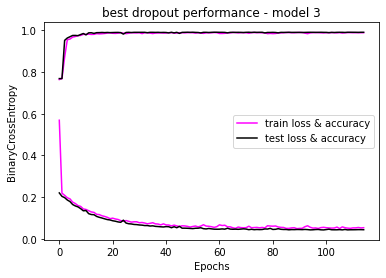

In [11]:
plt.plot(storia_best_dropout['loss'], color = 'magenta', label = 'train loss & accuracy')
plt.plot(storia_best_dropout['accuracy'], color = 'magenta')
plt.plot(storia_best_dropout['val_loss'], color = 'black', label = 'test loss & accuracy')
plt.plot(storia_best_dropout['val_accuracy'], color = 'black')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('best dropout performance - model 3')
plt.legend()
plt.show()

Accuracy 0.9898682877406282
F1-score [0.9933687  0.97854077]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



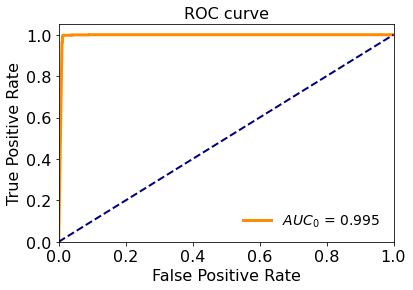

In [13]:
y_pred = best_dropout.predict_classes(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
y_score = best_dropout.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()